In [9]:

import time
import warnings

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from selenium import webdriver
from selenium.webdriver.firefox.options import Options as FirefoxOptions

from clear_massages import clear, is_clear
from landing import is_landing_main, landing_get_image
from taken import is_taken, log_out, refresh

warnings.filterwarnings('ignore')
import platform
from pathlib import Path

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from flask import Flask
from flask_restful import Api, Resource

from config import DRIVERS_DIR

In [10]:


def init_driver(url = 'https://web.whatsapp.com/', explorer: str = 'firefox'):
    # try:
    #     driver
    #     return driver
    # except:
    #     pass

    if explorer == 'chrome':
        chrome_driver_path = 'chromedriver_win32/chromedriver.exe'
        op = webdriver.ChromeOptions()
        op.add_argument('headless')

        driver = webdriver.Chrome(chrome_driver_path)
    
    if explorer == 'firefox':

        options = FirefoxOptions()
        options.add_argument("--headless")
        print(platform.system())
        if 'indow' in platform.system():
                driver = webdriver.Firefox(executable_path = str(DRIVERS_DIR / 'geckodriver-v0.29.1-win64' / 'geckodriver.exe'), options=options)#, chrome_options=op)
        else:
            try:
                driver = webdriver.Firefox(executable_path = str(DRIVERS_DIR / 'geckodriver-v0.29.1-linux32' / 'geckodriver'), options=options)#, chrome_options=op)
            except:
                driver = webdriver.Firefox(executable_path = str(DRIVERS_DIR / 'geckodriver-v0.29.1-linux64' / 'geckodriver'), options=options)#, chrome_options=op)
        
    driver.get(url)

    time.sleep(5)

    # url = driver.command_executor._url
    # session_id = driver.session_id 

    return driver

In [11]:
driver = init_driver()

Windows


In [58]:
from landing import landing_get_image, is_landing_main

import base64
import time

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
while(is_landing_main(driver)):
    canvas_base64 = landing_get_image(driver)
    canvas_png = base64.b64decode(canvas_base64)
    # # # save to a file
    from config import PROJECT_DIR
    with open(str(PROJECT_DIR / r"scan.png"), 'wb') as f:
        f.write(canvas_png)
    img = mpimg.imread(str(PROJECT_DIR / r"scan.png"))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    time.sleep(2)

In [55]:
import time

from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait


pane_side = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.ID, 'pane-side'))
)
driver.execute_script(f'arguments[0].scrollTop = 0', pane_side)

In [57]:
driver.close()

In [1]:
import selenium

In [42]:
chats_header= pane_side.find_element(by = By.CSS_SELECTOR, value = "#pane-side>div>div>div")

In [43]:
chats_header.get_attribute('aria-label')

"רשימת צ'אטים"

In [44]:
chats= pane_side.find_elements(by = By.CSS_SELECTOR, value = "#pane-side>div>div>div>div")

In [53]:
chats[0].get_attribute('style')

'z-index: 1835; transition: transform 200ms ease-in-out 0s; height: 72px; transform: translateY(792px);'

In [59]:
bar = chats[0].find_element(By.XPATH,"./div/div/div[2]/div[2]")
bar.get_attribute('class')

'_37FrU'

In [67]:
bar.find_element(By.XPATH,"./div[2]/span[1]/div/span").get_attribute('class')

''

In [96]:
'ab' in 'abc'

True

In [2]:

import streamlit as st
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium.webdriver.remote.webdriver import WebDriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import time
def init_driver():
    url = 'https://web.whatsapp.com/'

    # chrome_driver_path = 'chromedriver_win32/chromedriver.exe'
    # op = webdriver.ChromeOptions()
    # # op.add_argument('headless')

    # driver = webdriver.Chrome(chrome_driver_path)
    # driver.get(url)


    options = FirefoxOptions()
    # options.add_argument("--headless")

    driver = webdriver.Firefox(executable_path = 'geckodriver-v0.29.1-win64/geckodriver.exe', options=options)#, chrome_options=op)
    driver.get(url)

    time.sleep(20)
    url = driver.command_executor._url
    session_id = driver.session_id 

    return driver, url, session_id

def get_driver(url, session_id):
    driver = webdriver.Remote(command_executor=url,desired_capabilities={})
    driver.close()   # this prevents the dummy browser
    driver.session_id = session_id
    st.write(is_landing_main(driver))
    return driver

def attach_to_session(executor_url, session_id):
    original_execute = webdriver.Firefox.execute
    def new_command_execute(self, command, params=None):
        if command == "newSession":
            # Mock the response
            return {'success': 0, 'value': None, 'sessionId': session_id}
        else:
            return original_execute(self, command, params)
    # Patch the function before creating the driver object
    WebDriver.execute = new_command_execute
    driver = webdriver.Remote(command_executor=executor_url, desired_capabilities={})
    driver.session_id = session_id
    # Replace the patched function with original function
    WebDriver.execute = original_execute
    return driver

In [23]:
old_driver, executor_url, session_id = init_driver()

In [24]:
old_driver.find_element_by_id('app')

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="6e2c9f6f-d749-4d5d-bff5-73c4ce0cfebd", element="d75dec6b-7119-4596-b84f-1294bff6b869")>

In [7]:
driver = attach_to_session(executor_url, session_id)

In [8]:
driver.find_element_by_id('app')

<selenium.webdriver.remote.webelement.WebElement (session="fc540b36-9ce3-4ee1-bcdf-66ea9845063c", element="bb55fbb9-875c-42b7-a803-cc270d5d8179")>

In [9]:
executor_url, session_id

('http://127.0.0.1:52025', 'fc540b36-9ce3-4ee1-bcdf-66ea9845063c')

restart kernel

In [4]:
executor_url, session_id = 'http://127.0.0.1:52025', 'fc540b36-9ce3-4ee1-bcdf-66ea9845063c'

In [5]:
driver = attach_to_session(executor_url, session_id)

2021-07-14 21:41:10.297 INFO    selenium.webdriver.remote.remote_connection: Could not connect to port 52025 on host 127.0.0.1
2021-07-14 21:41:10.299 INFO    selenium.webdriver.remote.remote_connection: Could not get IP address for host: 127.0.0.1


In [7]:
driver2 = webdriver.Remote(command_executor=executor_url, desired_capabilities={})
driver2.session_id = session_id

2021-07-14 21:43:19.380 INFO    selenium.webdriver.remote.remote_connection: Could not connect to port 52025 on host 127.0.0.1
2021-07-14 21:43:19.381 INFO    selenium.webdriver.remote.remote_connection: Could not get IP address for host: 127.0.0.1
2021-07-14 21:43:21.428 WARNING urllib3.connectionpool: Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000024D842F17C8>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /session
2021-07-14 21:43:23.479 WARNING urllib3.connectionpool: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000024D842F1A88>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine 

MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=52025): Max retries exceeded with url: /session (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000024D842F5EC8>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [15]:
!pip install robotframework

In [16]:
from robot.libraries.BuiltIn import BuiltIn

In [33]:
BuiltIn().get_library_instance('SeleniumLibrary')

RobotNotRunningError: Cannot access execution context

In [6]:
driver.find_element_by_id('app')

2021-07-14 21:41:12.401 WARNING urllib3.connectionpool: Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000024D84259648>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /session/fc540b36-9ce3-4ee1-bcdf-66ea9845063c/element
2021-07-14 21:41:14.445 WARNING urllib3.connectionpool: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000024D842660C8>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /session/fc540b36-9ce3-4ee1-bcdf-66ea9845063c/element
2021-07-14 21:41:16.497 WARNING urllib3.connectionpool: Retrying (Retry(total=0, connect=None, read=None, redirect=None, statu

MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=52025): Max retries exceeded with url: /session/fc540b36-9ce3-4ee1-bcdf-66ea9845063c/element (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000024D84266F88>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [82]:
%time
driver.find_element_by_class_name("landing-main")

Wall time: 0 ns


<selenium.webdriver.remote.webelement.WebElement (session="16374e34-6874-4fb9-96e6-090026aa8a8b", element="38e74dd9-61ff-482a-af8b-dfc884019947")>

In [83]:
%time
old_driver.find_element_by_class_name("landing-main")

Wall time: 0 ns


<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="16374e34-6874-4fb9-96e6-090026aa8a8b", element="38e74dd9-61ff-482a-af8b-dfc884019947")>

In [64]:
attach_to_session(executor_url, session_id).find_element_by_class_name('app')

2021-07-14 21:03:59.175 WARNING urllib3.connectionpool: Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E7AF07D848>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /session/7e1730ef-6732-4306-ad29-ae689659cba6/element
2021-07-14 21:04:01.227 WARNING urllib3.connectionpool: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E7AF082948>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /session/7e1730ef-6732-4306-ad29-ae689659cba6/element
2021-07-14 21:04:03.276 WARNING urllib3.connectionpool: Retrying (Retry(total=0, connect=None, read=None, redirect=None, statu

MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=51475): Max retries exceeded with url: /session/7e1730ef-6732-4306-ad29-ae689659cba6/element (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E7AF08A188>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [66]:
driver.close()

2021-07-14 21:05:02.390 WARNING urllib3.connectionpool: Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E7AF105148>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /session/7e1730ef-6732-4306-ad29-ae689659cba6/window
2021-07-14 21:05:04.437 WARNING urllib3.connectionpool: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E7AF0F6F48>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /session/7e1730ef-6732-4306-ad29-ae689659cba6/window
2021-07-14 21:05:06.478 WARNING urllib3.connectionpool: Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=

MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=51475): Max retries exceeded with url: /session/7e1730ef-6732-4306-ad29-ae689659cba6/window (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E7AF0FD9C8>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [93]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time

url = 'https://web.whatsapp.com/'

chrome_driver_path = 'chromedriver_win32/chromedriver.exe'
op = webdriver.ChromeOptions()
op.add_argument('headless')

driver = webdriver.Chrome(chrome_driver_path)#, chrome_options=op)
driver.get(url)

# time.sleep(100)

In [15]:
    from selenium import webdriver
    from selenium.webdriver.common.keys import Keys
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.webdriver.firefox.options import Options

import time

url = 'https://web.whatsapp.com/'

# chrome_driver_path = 'chromedriver_win32/chromedriver.exe'
from selenium.webdriver.firefox.options import Options as FirefoxOptions

options = FirefoxOptions()
# options.add_argument("--headless")

driver = webdriver.Firefox(executable_path = 'geckodriver-v0.29.1-win64/geckodriver.exe', options=options)#, chrome_options=op)
driver.get(url)

# time.sleep(100)

In [ ]:
from selenium.webdriver.firefox.options import Options as FirefoxOptions

options = FirefoxOptions()
options.add_argument("--headless")
driver = webdriver.Firefox(options=options)
driver.get("https://pythonbasics.org")

In [4]:
landing_main = driver.find_element_by_class_name("landing-main")
landing_main.find_element(by = By.XPATH, value = './div/div[2]/div/canvas')

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="ff050730-7b1b-4d90-b12d-71c0dfbe8fb4", element="25bfffee-f7a5-446c-8e6e-e8127cbfab31")>

In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
from src.clear_massages import main

In [57]:
cm.main

<function src.clear_massages.main(driver)>

In [35]:
driver.close()

In [92]:
driver.close()

In [10]:
def get_pane_side(driver, seconds_to_wait = 50):
    pane_side = WebDriverWait(driver, seconds_to_wait).until(
        EC.presence_of_element_located((By.ID, 'pane-side'))
    )
    driver.execute_script(f'arguments[0].scrollTop = 0', pane_side)
    return pane_side

def get_chats(pane_side):
    return pane_side.find_elements(by = By.CSS_SELECTOR, value = "#pane-side>div>div>div>div")

def is_chat_unread_and_silent(chat):
    try:
#         name = chat.find_element(By.XPATH,"./div/div/div[2]/div[1]/div/span").get_attribute('title')
#         print(name)
        bar = chat.find_element(By.XPATH,"./div/div/div[2]/div[2]")
        first_div = bar.find_element(By.XPATH,"./div[2]/span[1]/div[1]")
        is_silent = first_div.get_attribute('aria-label') == "צ'אט מושתק"
        second_div = bar.find_element(By.XPATH,"./div[2]/span[1]/div[2]/span")
#         print('הודעות' in second_div.get_attribute('aria-label'))
        num_unread = second_div.text
        is_unread = num_unread != ''
        return is_unread and is_silent
    except:
        return False
    
def scroll_chats(driver, pane_side, step_size = 500):
    current_height = int(pane_side.get_attribute('scrollTop'))
    top_height = int(pane_side.get_attribute('scrollTop'))
    next_height = max(current_height + step_size, top_height)
    driver.execute_script(f'arguments[0].scrollTop = {next_height}', pane_side)
    
    finish_scrolling = (next_height == top_height)
    return finish_scrolling
 


In [11]:
 pane_side = get_pane_side(driver, 10)
while(True):
    finish_scrolling = False
    allclear_counter = 0
    while(not finish_scrolling):
        chats = get_chats(pane_side)
        allclear_counter += 1

        for chat in chats:
            if is_chat_unread_and_silent(chat):
                allclear_counter = 0
                chat.click()
                time.sleep(0.1)
        finish_scrolling = scroll_chats(driver, pane_side)

        if allclear_counter > 5:
            finish_scrolling = True
        time.sleep(0.5)
    time.sleep(60)
    pane_side = get_pane_side(driver, 10)

KeyboardInterrupt: 

In [8]:

pane_side = get_pane_side(driver, 10)
while(True):
    finish_scrolling = False
    while(not finish_scrolling):
        chats = get_chats(pane_side)
        allclear = True
        allclear_counter += 1
        
        for chat in chats:
            if is_chat_unread_and_silent(chat):
                allclear = False
                allclear_counter = 0
                chat.click()
    #             time.sleep(1)
        finish_scrolling = scroll_chats(pane_side)
        
        if allclear_counter > 5:
            finish_scrolling = True
#         time.sleep(0.5)
    time.sleep(1800)
    pane_side = get_pane_side(driver, 10)

NameError: name 'allclear_counter' is not defined

In [91]:

landing_main.find_element(by = By.XPATH, value = './div/div[2]/div').get_attribute('innerHTML')

'כדי להשתמש ב-WhatsApp, עדכן/י את <a href="https://support.google.com/chrome/answer/95414">Chrome</a> או השתמש/י ב- <a href="http://www.firefox.com">Mozilla Firefox</a>, <a href="https://www.apple.com/safari/">Safari</a>, <a href="https://www.microsoft.com/edge">Microsoft Edge</a> או <a href="http://www.opera.com">Opera</a>.'

In [89]:
for e in landing_main.find_elements(by = By.XPATH, value = './div/div[2]/div/*'):
    print(e.get_attribute('tag'))

None
None
None
None
None
None


<selenium.webdriver.remote.webelement.WebElement (session="d033f0a75a3a1769e80a69afca268299", element="fc32afa7-bfb4-4fcd-a90d-3ff5ed61cb34")>

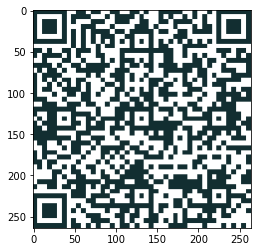

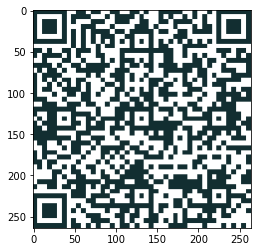

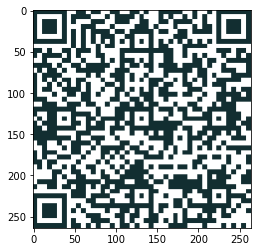

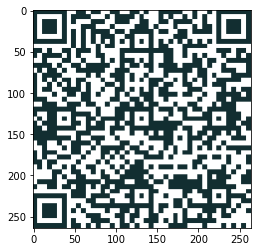

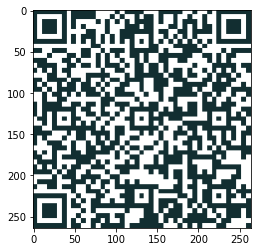

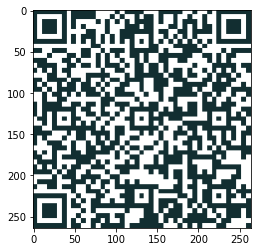

NoSuchElementException: Message: Unable to locate element: ./div/div[2]/div/canvas


In [16]:
import matplotlib.pyplot as plt
def is_landing_main(driver):
    try:
        driver.find_element_by_class_name("landing-main")
        return True
    except:
        return False

def get_landing_main(driver):
    landing_main = driver.find_element_by_class_name("landing-main")
    return landing_main
    
def reload_qr(landing_main):
    try:
        but = landing_main.find_element(by = By.XPATH, value = './div/div[2]/div/span/button')
        but.click()
        time.sleep(3)
        return True
    except:
        return False

def plot_qr(landing_main):
    import base64
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    
    canvas = landing_main.find_element(by = By.XPATH, value = './div/div[2]/div/canvas')


    # get the canvas as a PNG base64 string
    canvas_base64 = driver.execute_script("return arguments[0].toDataURL('image/png').substring(21);", canvas)

    # decode
    canvas_png = base64.b64decode(canvas_base64)

    # # save to a file
    with open(r"scan.png", 'wb') as f:
        f.write(canvas_png)

    img = mpimg.imread(r"scan.png")
    plt.imshow(img)
    plt.show()

while is_landing_main(driver):
    landing_main = get_landing_main(driver)
    reload_qr(landing_main)
    plot_qr(landing_main)
    time.sleep(5)
    plt.close('all')

In [28]:
def is_taken(driver):
    try:
        wh_app = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'app'))
        )
        new_path = wh_app.find_element_by_xpath('./div/div/div/div/div/div/div').text
        is_closed = new_path == 'WhatsApp פתוח במחשב או דפדפן אחר. לחץ/י על "השתמש כאן" כדי להשתמש ב-WhatsApp Web בחלון זה.'
        return is_closed
    except:
        return False
    
def refresh():
    refresh_button = wh_app.find_element_by_xpath('./div/div/div/div/div/div/div/div[2]/div/div')
    refresh_button.click()
    time.sleep(5)

def log_out():
    quit_button = wh_app.find_element_by_xpath('./div/div/div/div/div/div/div/div[1]/div/div')
    quit_button.click()
    time.sleep(5)



'WhatsApp פתוח במחשב או דפדפן אחר. לחץ/י על "השתמש כאן" כדי להשתמש ב-WhatsApp Web בחלון זה.'

'השתמש/י כאן'

In [55]:
#.get_attribute('xmlns')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"./div/div[2]/div/span/button"}
  (Session info: chrome=91.0.4472.77)


In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rc

TypeError: Image data of dtype |S6864 cannot be converted to float

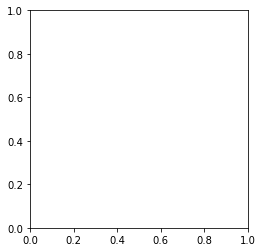

In [13]:
import matplotlib.pyplot as plt

plt.imshow(canvas_png)

'132191'

In [111]:
chats = get_chats(pane_side)
for chat in chats:
    if is_chat_unread_and_silent(chat):
        chat.click()
        time.sleep(0.1)
driver.execute_script('arguments[0].scrollTop = 800', pane_side)

In [103]:
driver.find_element(By.)

In [107]:
app = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.ID, 'app'))
)

In [ ]:
app.find_element(By.XPATH,"./div/div/div[2]/div[2]")

In [147]:
# eula = dr.find_element_by_id('eulaFrame')
# arguments[0].scrollTop = arguments[0].scrollHeight
driver.execute_script('arguments[0].scrollTop = arguments[0].scrollTop + 1000', pane_side)

In [104]:
pane_side.scrollHeight

AttributeError: 'WebElement' object has no attribute 'scrollHeight'

In [75]:
driver.execute_script("window.scrollTo(0, 1080)") 

In [73]:
chats

[<selenium.webdriver.remote.webelement.WebElement (session="cced1d881b0858730286e8743b51a5c2", element="1224e0d4-9819-4ea3-b3af-e7642c718f3b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cced1d881b0858730286e8743b51a5c2", element="40055bd8-8869-4cf8-9c59-59b66b448caa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cced1d881b0858730286e8743b51a5c2", element="f3102681-491d-4f98-a56d-68f98d98b738")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cced1d881b0858730286e8743b51a5c2", element="aa9a68fb-73fc-40c5-bc43-9ea9e7d0f101")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cced1d881b0858730286e8743b51a5c2", element="dac3e531-b67b-49a9-99f3-638f4e8df7e3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cced1d881b0858730286e8743b51a5c2", element="28677a22-40e7-42a0-b7bc-3c40b9944cd3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cced1d881b0858730286e8743b51a5c2", element="373c1a85-02ed-4d2c-ac18-94

In [70]:
import numpy as np


<selenium.webdriver.remote.webelement.WebElement (session="cced1d881b0858730286e8743b51a5c2", element="a294aa74-0c61-44d6-b15e-11d60afb2c61")>

In [16]:
# from selenium import webdriver
# from selenium.webdriver.remote.webdriver import WebDriver

# executor_url = driver.command_executor._url
# session_id = driver.session_id

# def attach_to_session(executor_url, session_id):
#     original_execute = WebDriver.execute
#     def new_command_execute(self, command, params=None):
#         if command == "newSession":
#             # Mock the response
#             return {'success': 0, 'value': None, 'sessionId': session_id}
#         else:
#             return original_execute(self, command, params)
#     # Patch the function before creating the driver object
#     WebDriver.execute = new_command_execute
#     driver = webdriver.Remote(command_executor=executor_url, desired_capabilities={})
#     driver.session_id = session_id
#     # Replace the patched function with original function
#     WebDriver.execute = original_execute
#     return driver

# driver = attach_to_session(executor_url, session_id)